In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [67]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Have_they_gotten_stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [68]:
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Have_they_gotten_stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [69]:
data = df[(df.id == 14180)]["smoking_status"]
data

5104    Unknown
Name: smoking_status, dtype: object

In [70]:
duplicates = df["id"].duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: id, Length: 5110, dtype: bool

In [71]:
df.loc[5108]

id                                   37544
gender                                Male
age                                   51.0
hypertension                             0
heart_disease                            0
ever_married                           Yes
work_type                          Private
Residence_type                       Rural
avg_glucose_level                   166.29
bmi                                   25.6
smoking_status             formerly smoked
Have_they_gotten_stroke                  0
Name: 5108, dtype: object

In [72]:
data = df[(df.gender == "Male") & (df.work_type == "Private")]["smoking_status"]
data = pd.DataFrame(data)
data

,smoking_status
0,formerly smoked
2,never smoked
5,formerly smoked
6,never smoked
13,Unknown
...,...
5077,Unknown
5084,smokes
5091,never smoked
5099,smokes


In [73]:
df.isna().sum()

id                           0
gender                       0
age                          0
hypertension                 0
heart_disease                0
ever_married                 0
work_type                    0
Residence_type               0
avg_glucose_level            0
bmi                        201
smoking_status               0
Have_they_gotten_stroke      0
dtype: int64

In [74]:
mean_data = df["bmi"].mean()

In [75]:
mean_data = round(mean_data,2)

In [76]:
df["bmi"] = df["bmi"].fillna(value = mean_data)

In [77]:
df.isna().sum()

id                         0
gender                     0
age                        0
hypertension               0
heart_disease              0
ever_married               0
work_type                  0
Residence_type             0
avg_glucose_level          0
bmi                        0
smoking_status             0
Have_they_gotten_stroke    0
dtype: int64

In [78]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [79]:
grouping = df.groupby(["Have_they_gotten_stroke","gender"])["smoking_status","work_type"]
grouping.value_counts()

/var/folders/mg/_ph786_s0m70h4rkcmct_qk00000gn/T/ipykernel_3795/3227241292.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouping = df.groupby(["Have_they_gotten_stroke","gender"])["smoking_status","work_type"]


Have_they_gotten_stroke  gender  smoking_status   work_type    
0                        Female  never smoked     Private          748
                                 Unknown          Private          360
                                 smokes           Private          301
                                 Unknown          children         290
                                 formerly smoked  Private          269
                                                                  ... 
1                        Male    never smoked     Govt_job           4
                                 smokes           Self-employed      4
                                 Unknown          Govt_job           2
                                 formerly smoked  Govt_job           2
                                 smokes           Govt_job           2
Length: 62, dtype: int64

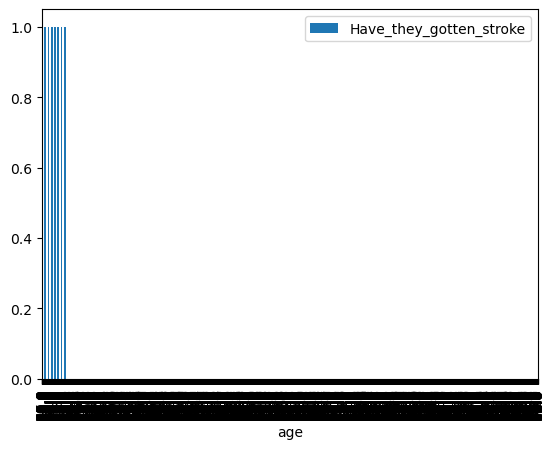

In [80]:
graph = df.plot.bar(x = "age", y = "Have_they_gotten_stroke")

In [81]:
graph

<AxesSubplot:xlabel='age'>

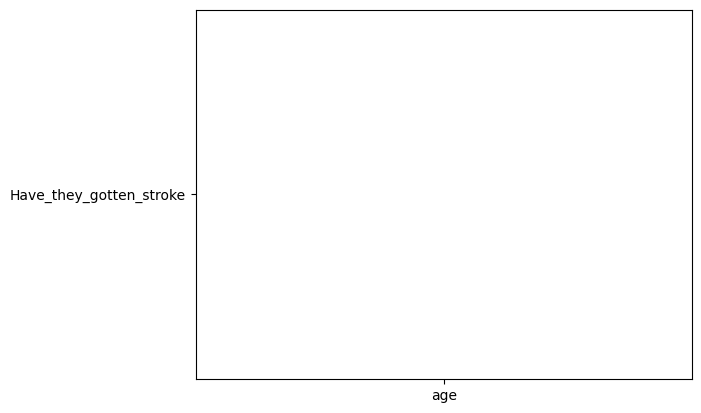

In [82]:
plt.bar("age","Have_they_gotten_stroke")
plt.show()

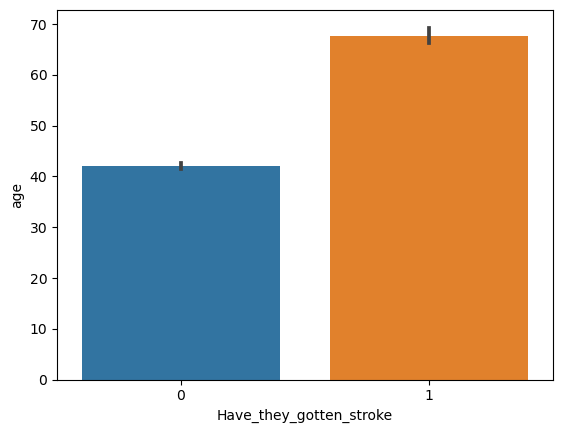

In [108]:
ax = sb.barplot(y = "age", x = "Have_they_gotten_stroke", data = df.sort_values("age",ascending=True))

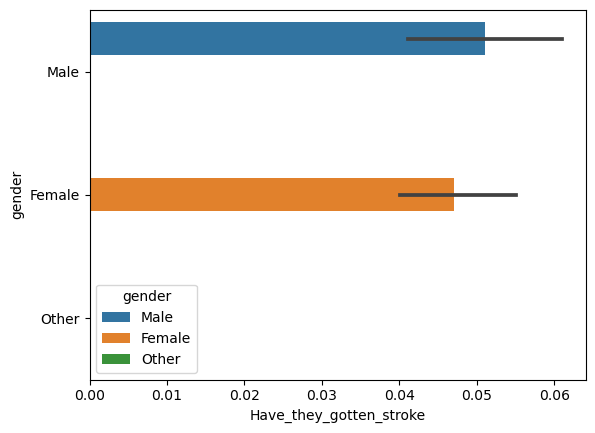

In [106]:
ax = sb.barplot(y = "gender", x = "Have_they_gotten_stroke", data = df, hue='gender')

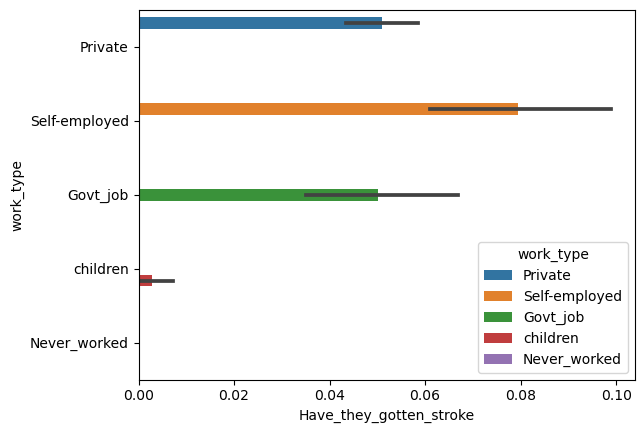

In [105]:
ax = sb.barplot(y = "work_type", x = "Have_they_gotten_stroke", data = df, hue='work_type')

In [ ]:
ax = sb.barplot(y = "age", x = "Have_they_gotten_stroke", data = df.head(5).sort_values("age",ascending=True), hue='age')